In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
import os
import glob

from pandas.api.types import CategoricalDtype

HOME = "/home/kwatchar3/spauq-home/spauq/expt/codec/musdb/results-2s/opus"

results = glob.glob(os.path.join(HOME, "opus*.csv"))

dfs = []

for r in results:
    model_name = r.split("/")[-1].replace(".csv", "")
    # print(model_name)
    codec, bitrate, mode = model_name.split("-")
    print(codec, bitrate, mode)
    df = pd.read_csv(r).rename(columns={'Unnamed: 0': 'title', 'Unnamed: 1': 'instrument'})
    df['codec'] = codec
    df['bitrate'] = int(bitrate)
    df['mode'] = int(mode)
    # df['mode'] = + df['mode'].apply(
    #     lambda x: {
    #         'joint0': 'no joint coding',
    #         'joint1': 'mid/side stereo',
    #         'joint2': 'intensity stereo',
    #     }[x]
    # )
    dfs.append(df)
    
# modetype = CategoricalDtype(['no joint coding', 'mid/side stereo', 'intensity stereo'], ordered=True)

    
df = pd.concat(dfs).reset_index().drop(columns='index').sort_values(['bitrate', 'mode'])
# df['mode'] = df['mode'].astype(modetype)

df

opus 192 0
opus 224 0
opus 56 0
opus 128 0
opus 48 0
opus 80 0
opus 64 0
opus 320 0
opus 56 10
opus 256 0
opus 32 10
opus 48 10
opus 160 10
opus 96 10
opus 224 10
opus 112 0
opus 32 0
opus 112 10
opus 160 0
opus 128 10
opus 80 10
opus 192 10
opus 320 10
opus 40 10
opus 96 0
opus 256 10
opus 64 10
opus 40 0


,title,instrument,SSR,SRR,cost,shift,scale,codec,bitrate,mode
800,AM Contra - Heart Peripheral,mixture,18.495232,8.831759,15.043758,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8138692800554951, 0.14261528829878842], [0...",opus,32,0
801,Al James - Schoolboy Facination,mixture,17.375943,7.588750,17.628588,"[[0.0, 0.0], [0.0, 0.0]]","[[0.80896355037573, 0.12886752836037324], [0.1...",opus,32,0
802,Angels In Amplifiers - I'm Alright,mixture,19.176185,9.182273,15.748931,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8702642140087611, 0.08497664461887719], [0...",opus,32,0
803,Arise - Run Run Run,mixture,23.459132,13.284177,13.861393,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8470512980632644, 0.13069635924744388], [0...",opus,32,0
804,BKS - Bulldozer,mixture,20.575781,10.654772,13.257443,"[[0.0, 0.0], [0.0, 0.0]]","[[0.8730968528887209, 0.10363841574384237], [0...",opus,32,0
...,...,...,...,...,...,...,...,...,...,...
1145,Timboz - Pony,mixture,51.586315,25.839353,2.579623,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9975693148383296, 0.0013551925795645685], ...",opus,320,10
1146,Tom McKenzie - Directions,mixture,33.232253,22.290393,3.609013,"[[0.0, 1.0], [0.0, 0.0]]","[[0.9498549386530578, 0.04746878798971257], [-...",opus,320,10
1147,Triviul feat. The Fiend - Widow,mixture,47.001927,23.803012,2.897929,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9924865347291513, 0.00363603248000671], [-...",opus,320,10
1148,We Fell From The Sky - Not You,mixture,44.486250,23.739686,3.110605,"[[0.0, 0.0], [0.0, 0.0]]","[[0.9898146802208259, 0.007594170687165772], [...",opus,320,10


In [14]:
def plot(brrange=[0, np.inf], ssr_step=25, srr_step=10):
    sns.set("paper", "whitegrid", "colorblind", font_scale=1.5)
    
    bf = (df['bitrate'] >= brrange[0]) & (df['bitrate'] <= brrange[1]) 

    f, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True, dpi=300)
    kwargs = dict(showfliers=True, notch=True, fliersize=1, flierprops={"marker": "x"}, width=0.9)
    sns.boxplot(df[bf], y='SSR', hue='mode', x='bitrate', ax=ax[0], **kwargs)
    sns.boxplot(df[bf], y='SRR', hue='mode', x='bitrate', ax=ax[1], **kwargs)
    
    
    ssr_min, ssr_max = df[bf]['SSR'].quantile(0.02), df[bf]['SSR'].max()
    ssr_min, ssr_max = np.floor(ssr_min/ssr_step)*ssr_step, np.ceil(ssr_max/ssr_step)*ssr_step
    ssr_minor_step = 1 if ssr_step <= 5 else 5
    
    srr_min, srr_max = df[bf]['SRR'].quantile(0.02), df[bf]['SRR'].max()
    srr_min, srr_max = np.floor(srr_min/srr_step)*srr_step, np.ceil(srr_max/srr_step)*srr_step
    srr_minor_step = 1 if srr_step <= 5 else 5

    ax[0].set_yticks(np.arange(ssr_min, ssr_max+1, ssr_step))
    ax[0].set_yticks(np.arange(ssr_min, ssr_max, ssr_minor_step), minor=True)
    ax[1].set_yticks(np.arange(srr_min, srr_max+1, srr_step))
    ax[1].set_yticks(np.arange(srr_min, srr_max, srr_minor_step), minor=True)
    ax[0].set(ylim=[ssr_min, ssr_max])
    ax[1].set(ylim=[srr_min, srr_max])

    for a in ax:
        a.grid(True, axis='y', which='minor')
        a.tick_params(axis='both', which='minor')
        a.set(xlabel=None)
        a.legend().remove()

    plt.tight_layout()
    f.align_ylabels(ax)
    plt.xlabel('constant bitrate (Kbps)')
    f.subplots_adjust(wspace=0, hspace=0.25)

    h, l = ax[0].get_legend_handles_labels()
    legend = f.legend(h, l, title="encoding complexity", loc='upper left', fontsize=10, ncols=3, bbox_to_anchor=(0.1, 0.95))#, fontsize=10)
    plt.setp(legend.get_title(),fontsize='small')

    ax[1].set(xticklabels=[])
    
    return ax


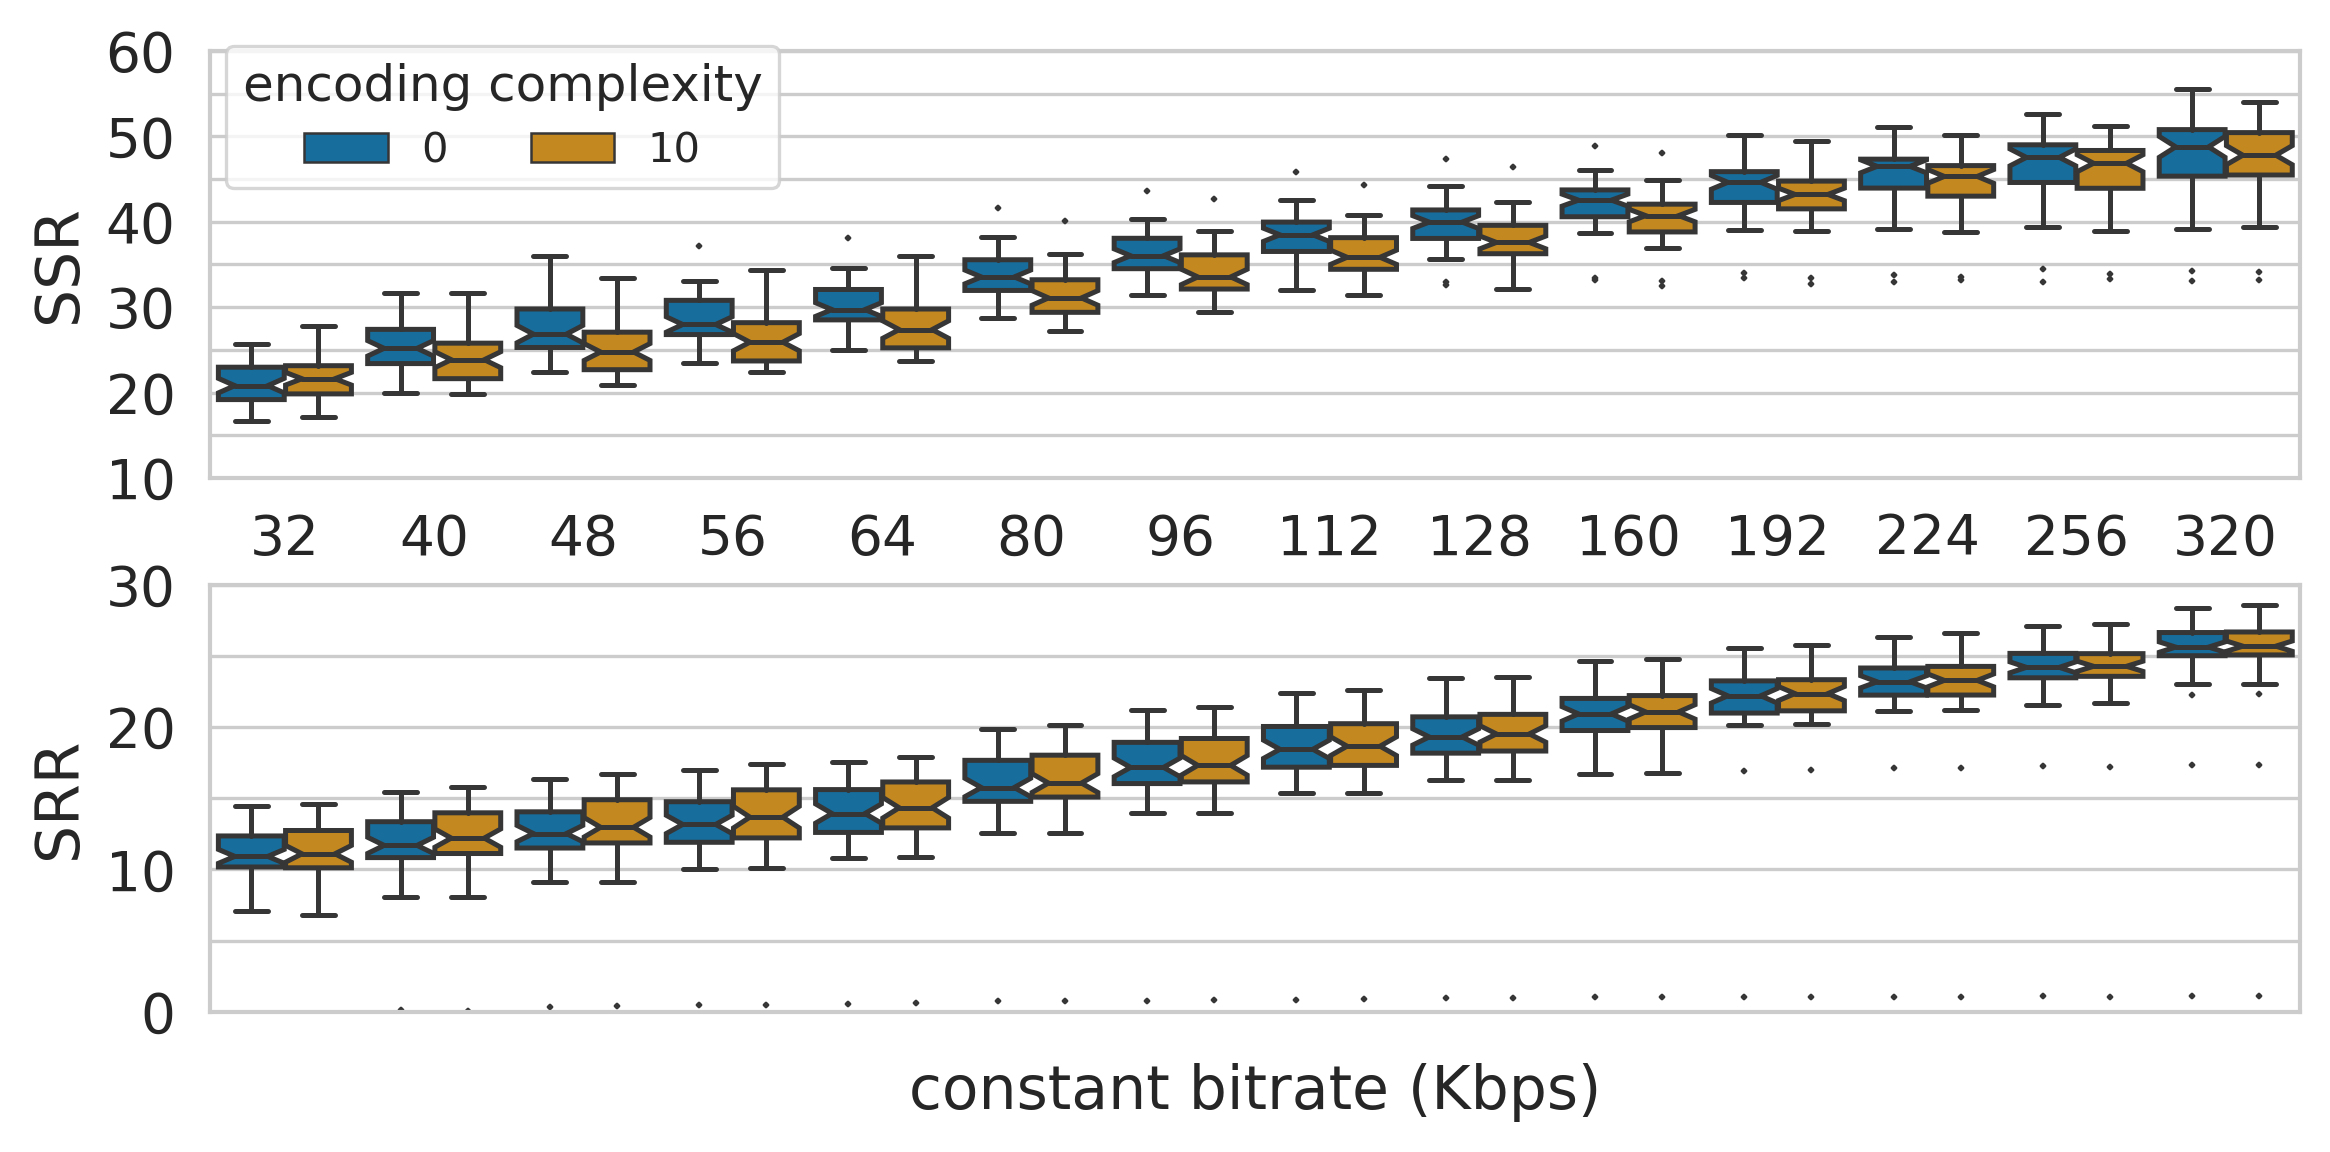

In [17]:
plot(ssr_step=10)
# plt.gcf().set_size_inches(6, 4)
plt.savefig("figs/opus-musdb.pdf", bbox_inches='tight')
plt.show()